<a href="https://colab.research.google.com/github/AliValizade/Machine_Learning/blob/main/ML_41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# KNN (K Nearest Neigber)

- Apple : 0
- Banana : 1
- watermelon : 2

<img src="https://fruityland.co/wp-content/uploads/2021/01/Granny-smith-green-apple-FL.jpg" width="200px" height="180px">

<img src="https://target.scene7.com/is/image/Target/GUEST_cf4773e6-afec-4aa1-89e7-74b7dfc09973?wid=1200&hei=1200&qlt=80&fmt=webp" width="200px" height="180px">

<img src="https://starfishmarket.com/wp-content/uploads/2015/11/watermelon-580x437.jpg" width="200px" height="180px">


In [37]:
n = 100
apple_width = np.random.normal(6, 1, n)
apple_lenght = np.random.normal(7, 1, n)
banana_width = np.random.normal(3, 1, n)
banana_lenght = np.random.normal(10, 1, n)
watermelon_width = np.random.normal(13, 1, n)
watermelon_lenght = np.random.normal(20, 1, n)

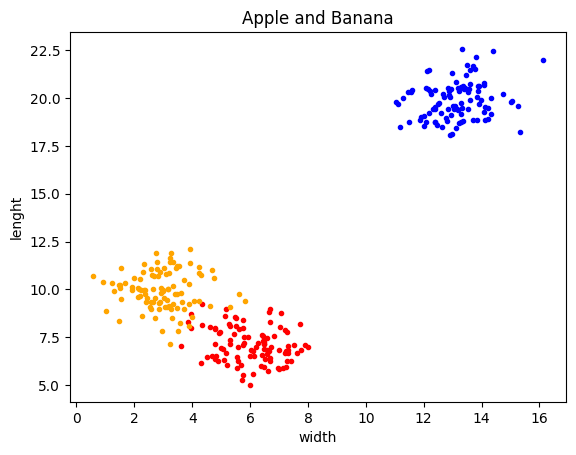

In [38]:
plt.scatter(apple_width, apple_lenght, c='red', marker='.')
plt.scatter(banana_width, banana_lenght, c='orange', marker='.')
plt.scatter(watermelon_width, watermelon_lenght, c='blue', marker='.')

plt.title('Apple and Banana')
plt.xlabel('width')
plt.ylabel('lenght')
plt.show()

In [4]:
width = np.concatenate((apple_width, banana_width, watermelon_width))
lenght = np.concatenate((apple_lenght, banana_lenght, watermelon_lenght))
X_train = np.array([width, lenght]).T

In [5]:
Y_apple =  np.zeros(n, dtype='int')
Y_banana = np.ones(n, dtype='int')
Y_watermelon = np.ones(n, dtype='int') * 2
Y_train = np.concatenate((Y_apple, Y_banana, Y_watermelon))

In [6]:
def euqlidian_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))

In [31]:
new_fruit = np.array([9, 15])

distances = []
for x in X_train:
  d = euqlidian_distance(new_fruit, x)
  distances.append(d)

In [32]:
k = 7

In [33]:
nearest_neighbors = np.argsort(distances)[0:k]

In [34]:
Y_train[nearest_neighbors]

array([1, 1, 2, 2, 1, 2, 2])

In [35]:
result = np.bincount(Y_train[nearest_neighbors])
result

array([0, 3, 4])

In [36]:
if np.argmax(result) == 0:
  print('Apple🍎')
elif np.argmax(result) == 1:
  print('Banana🍌')
else:
  print('Watermelon🍉')

Watermelon🍉
